In [ ]:
import os

print(os.getpid())

print("import")

from transformers import AutoTokenizer, AutoModel, AutoModelForCausalLM
import torch

print("tok")

model_name = "bigscience/bloom-560m"
#model_name = "bigscience/bloom-1b1"
#model_name = "bigscience/bloom-1b7"
#model_name = "bigscience/bloom-3b"
#model_name = "bigscience/bloom-7b1"

device = "cuda:0"

tok = AutoTokenizer.from_pretrained(model_name)

print("model")

model = AutoModelForCausalLM.from_pretrained(model_name)

In [ ]:
model = model.to(device)

def tokenize(text):
    return tok.batch_encode_plus(
        [text],
        return_tensors='pt',
        max_length=128,
        padding=True,
        truncation=True,
        # return_token_type_ids=True,
        return_attention_mask=True
    ).to(device)

In [ ]:
# out = model(**tokenize("hello"))
from ipywidgets import widgets, interact
import matplotlib.pyplot as plt

ress = []

@interact(input_text=widgets.Text("Fill in the name of these NBA players: Michael", continuous_update=True))
def generate(input_text):
    global ress

    if len(input_text) == 0: return

    temp = model.forward(**tokenize(input_text))

    logits = temp['logits'][0,-1].detach().cpu()
    probits = torch.nn.functional.softmax(logits, dim=0)

    tops = torch.topk(probits, 10)

    toks = tok.batch_decode(tops.indices)

    ress = [str(toks)] + ress
    ress = ress[0:10]

    fig, ax = plt.subplots()

    ax.bar(x=range(10), height=tops.values)
    ax.set_xticks(range(len(toks)))
    ax.set_xticklabels(toks)

    for res in ress:
        print(res)

In [74]:
def prob_next(text, tok_id):
    temp = model.forward(**tokenize(text))
    logits = temp['logits'][0,-1].detach().cpu()
    probits = torch.nn.functional.softmax(logits, dim=0)
    return probits[tok_id].detach().cpu().numpy().item()


In [75]:
prob_next("e=3", 3)

0.0

In [ ]:
vocab = {tok.decode(i): i for i in range(len(tok.vocab))}

In [ ]:
import re
pat = re.compile(r'[0-9]+')

num_toks = []

for k, i in vocab.items():
    if pat.fullmatch(k):
        num_toks.append((k, i))

In [132]:
pi = "3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019893809525720106548586327886593615338182796823030195203530185296899577362259941389124972177528347913151557485724245415069595082953311686172785588907509838175463746493931925506040092770167113900984882401285836160356370766010471018194295559619894676783744944825537977472684710404753464620804668425906949129331367702898915210475216205696602405803815019351125338243003558764024749647326391419927260426992279678235478163600934172164121992458631503028618297455570674983850549458858692699569092721079750930295532116534498720275596023648066549911988183479775356636980742654252786255181841757467289097777279380008164706001614524919217321721477235014144197356854816136115735255213347574184946843852332390739414333454776241686251898356948556209921922218427255025425688767179049460165346680498862723279178608578438382796797668145410095388378636095068006422512520511739298489608412848862694560424196528502221066118630674427862203919494504712371378696095636437191728746776465757396241389086583264599581339047802759009946576407895126946839835259570982582262052248940772671947826848260147699090264013639443745530506820349625245174939965143142980919065925093722169646151570985838741059788595977297549893016175392846813826868386894277415599185592524595395943104997252468084598727364469584865383673622262609912460805124388439045124413654976278079771569143599770012961608944169486855584840635342207222582848864815845602850601684273945226746767889525213852254995466672782398645659611635488623057745649803559363456817432411251507606947945109659609402522887971089314566913686722874894056010150330861792868092087476091782493858900971490967598526136554978189312978482168299894872265880485756401427047755513237964145152374623436454285844479526586782105114135473573952311342716610213596953623144295248493718711014576540359027993440374200731057853906219838744780847848968332144571386875194350643021845319104848100537061468067491927819119793995206141966342875444064374512371819217999839101591956181467514269123974894090718649423196156794520809514655022523160388193014209376213785595663893778708303906979207734672218256259966150142150306803844773454920260541466592520149744285073251866600213243408819071048633173464965145390579626856100550810665879699816357473638405257145910289706414011097120628043903975951567715770042033786993600723055876317635942187312514712053292819182618612586732157919841484882916447060957527069572209175671167229109816909152801735067127485832228718352093539657251210835791513698820914442100675103346711031412671113699086585163983150197016515116851714376576183515565088490998985998238734552833163550764791853589322618548963213293308985706420467525907091548141654985946163718027098199430992448895757128289059232332609729971208443357326548938239119325974636673058360414281388303203824903758985243744170291327656180937734440307074692112019130203303801976211011004492932151608424448596376698389522868478312355265821314495768572624334418930396864262434107732269780280731891544110104468232527162010526522721116603966655730925471105578537634668206531098965269186205647693125705863566201855810072936065987648611791045334885034611365768675324944166803962657978771855608455296541266540853061434443185867697514566140680070023787765913440171274947042056223053899456131407112700040785473326993908145466464588079727082668306343285878569830523580893306575740679545716377525420211495576158140025012622859413021647155097925923099079654737612551765675135751782966645477917450112996148903046399471329621073404375189573596145890193897131117904297828564750320319869151402870808599048010941214722131794764777262241425485454033215718530614228813758504306332175182979866223717215916077166925474873898665494945011465406284336639379003976926567214638530673609657120918076383271664162748888007869256029022847210403172118608204190004229661711963779213375751149595015660496318629472654736425230817703675159067350235072835405670403867435136222247715891504953098444893330963408780769325993978054193414473774418426312986080998886874132604721569516239658645730216315981931951673538129741677294786724229246543668009806769282382806899640048243540370141631496589794092432378969070697794223625082216889573837986230015937764716512289357860158816175578297352334460428151262720373431465319777741603199066554187639792933441952154134189948544473456738316249934191318148092777710386387734317720754565453220777092120190516609628049092636019759882816133231666365286193266863360627356763035447762803504507772355471058595487027908143562401451718062464362679456127531813407833033625423278394497538243720583531147711992606381334677687969597030983391307710987040859133746414428227726346594704745878477872019277152807317679077071572134447306057007334924369311383504931631284042512192565179806941135280131470130478164378851852909285452011658393419656213491434159562586586557055269049652098580338507224264829397285847831630577775606888764462482468579260395352773480304802900587607582510474709164396136267604492562742042083208566119062545433721315359584506877246029016187667952406163425225771954291629919306455377991403734043287526288896399587947572917464263574552540790914513571113694109119393251910760208252026187985318877058429725916778131496990090192116971737278476847268608490033770242429165130050051683233643503895170298939223345172201381280696501178440874519601212285993716231301711444846409038906449544400619869075485160263275052983491874078668088183385102283345085048608250393021332197155184306354550076682829493041377655279397517546139539846833936383047461199665385815384205685338621867252334028308711232827892125077126294632295639898989358211674562701021835646220134967151881909730381198004973407239610368540664319395097901906996395524530054505806855019567302292191393391856803449039820595510022635353619204199474553859381023439554495977837790237421617271117236434354394782218185286240851400666044332588856986705431547069657474585503323233421073015459405165537906866273337995851156257843229882737231989875714159578111963583300594087306812160287649628674460477464915995054973742562690104903778198683593814657412680492564879855614537234786733039046883834363465537949864192705638729317487233208376011230299113679386270894387993620162951541337142489283072201269014754668476535761647737946752004907571555278196536213239264061601363581559074220202031872776052772190055614842555187925303435139844253223415762336106425063904975008656271095359194658975141310348227693062474353632569160781547818115284366795706110861533150445212747392454494542368288606134084148637767009612071512491404302725386076482363414334623518975766452164137679690314950191085759844239198629164219399490723623464684411739403265918404437805133389452574239950829659122850855582157250310712570126683024029295252201187267675622041542051618416348475651699981161410100299607838690929160302884002691041407928862150784245167090870006992821206604183718065355672525325675328612910424877618258297651579598470356222629348600341587229805349896502262917487882027342092222453398562647669149055628425039127577102840279980663658254889264880254566101729670266407655904290994568150652653053718294127033693137851786090407086671149655834343476933857817113864558736781230145876871266034891390956200993936103102916161528813843790990423174733639480457593149314052976347574811935670911013775172100803155902485309066920376719220332290943346768514221447737939375170344366199104033751117354719185504644902636551281622882446257591633303910722538374218214088350865739177150968288747826569959957449066175834413752239709683408005355984917541738188399944697486762655165827658483588453142775687900290951702835297163445621296404352311760066510124120065975585127617858382920419748442360800719304576189323492292796501987518721272675079812554709589045563579212210333466974992356302549478024901141952123828153091140790738602515227429958180724716259166854513331239480494707911915326734302824418604142636395480004480026704962482017928964766975831832713142517029692348896276684403232609275249603579964692565049368183609003238092934595889706953653494060340216654437558900456328822505452556405644824651518754711962184439658253375438856909411303150952617937800297412076651479394259029896959469955657612186561967337862362561252163208628692221032748892186543648022967807057656151446320469279068212073883778142335628236089632080682224680122482611771858963814091839036736722208883215137556003727983940041529700287830766709444745601345564172543709069793961225714298946715435784687886144458123145935719849225284716050492212424701412147805734551050080190869960330276347870810817545011930714122339086639383395294257869050764310063835198343893415961318543475464955697810382930971646514384070070736041123735998434522516105070270562352660127648483084076118301305279320542746286540360367453286510570658748822569815793678976697422057505968344086973502014102067235850200724522563265134105592401902742162484391403599895353945909440704691209140938700126456001623742880210927645793106579229552498872758461012648369998922569596881592056001016552563756785667227966198857827948488558343975187445455129656344348039664205579829368043522027709842942325330225763418070394769941597915945300697521482933665556615678736400536665641654732170439035213295435291694145990416087532018683793702348886894791510716378529023452924407736594956305100742108714261349745956151384987137570471017879573104229690666702144986374645952808243694457897723300487647652413390759204340196340391147320233807150952220106825634274716460243354400515212669324934196739770415956837535551667302739007497297363549645332888698440611964961627734495182736955882207573551766515898551909866653935494810688732068599075407923424023009259007017319603622547564789406475483466477604114632339056513433068449539790709030234604614709616968868850140834704054607429586991382966824681857103188790652870366508324319744047718556789348230894310682870272280973624809399627060747264553"

In [133]:
pi

'3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491298336733624406566430860213949463952247371907021798609437027705392171762931767523846748184676694051320005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235420199561121290219608640344181598136297747713099605187072113499999983729780499510597317328160963185950244594553469083026425223082533446850352619311881710100031378387528865875332083814206171776691473035982534904287554687311595628638823537875937519577818577805321712268066130019278766111959092164201

In [134]:
def next_toks(pos):
    ret = []
    for tok in num_toks:
        if pi[pos:].startswith(tok[0]):
            ret.append(tok)
    return ret

In [135]:
next_toks(3)

[('4', 23), ('41', 7696), ('415', 104980)]

In [140]:
from queue import Queue
from typing import List, Dict
from collections import defaultdict

def runsteps():
    state = defaultdict(float)
    state[7] = 1.0
    finals = defaultdict(float)

    print("starting ", pi[0:6])

    while len(state) > 0:
        print(state)
        step(state, finals)

    return finals

def step(state: Dict, finals: Dict):
    pos, prob = next(iter(state.items()))

    del state[pos]

    finals[pos] += prob            
    if prob <= 0.0000000000001:
        return

    for step in next_toks(pos):
        state[pos + len(step[0])] += prob * prob_next(pi[0:pos], step[1])

q = runsteps()

starting  3.1415
defaultdict(<class 'float'>, {7: 1.0})
defaultdict(<class 'float'>, {8: 9.122971823671833e-05, 9: 0.11009670048952103, 10: 0.5053669810295105})
defaultdict(<class 'float'>, {9: 0.11009670318784302, 10: 0.5053670219222633, 11: 1.5560079074184188e-09})
defaultdict(<class 'float'>, {10: 0.5053691571374738, 11: 0.0005820057678915587, 12: 1.2019254893686796e-07})
defaultdict(<class 'float'>, {11: 0.000582006399845553, 12: 0.43636840385639225, 13: 0.00010227449423656784})
defaultdict(<class 'float'>, {12: 0.436368405387228, 13: 0.00010228693220694203, 14: 3.524076325975106e-10})
defaultdict(<class 'float'>, {13: 0.000102287183232379, 14: 0.40705708734972523, 15: 3.673689246048672e-05})
defaultdict(<class 'float'>, {14: 0.4070570876149518, 15: 3.6737713088901455e-05, 16: 8.917084639772673e-10})
defaultdict(<class 'float'>, {15: 3.676472703218217e-05, 16: 0.3697921312381537, 17: 0.006760795263064951})
defaultdict(<class 'float'>, {16: 0.369792131264076, 17: 0.00676079542377914

In [141]:
# q

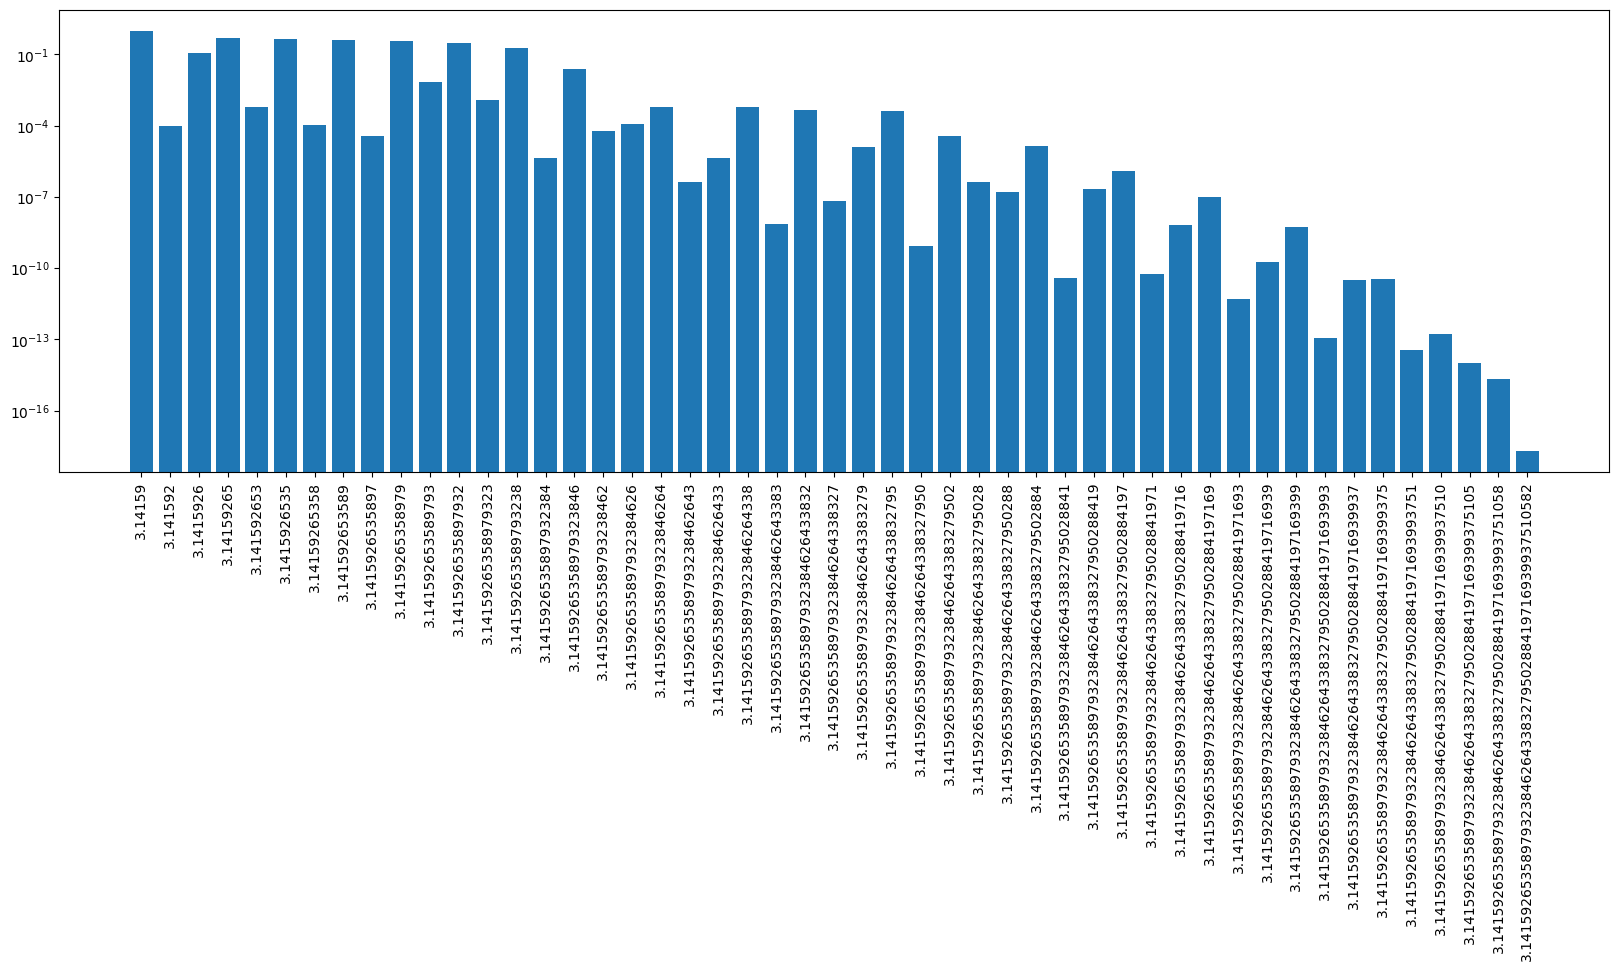

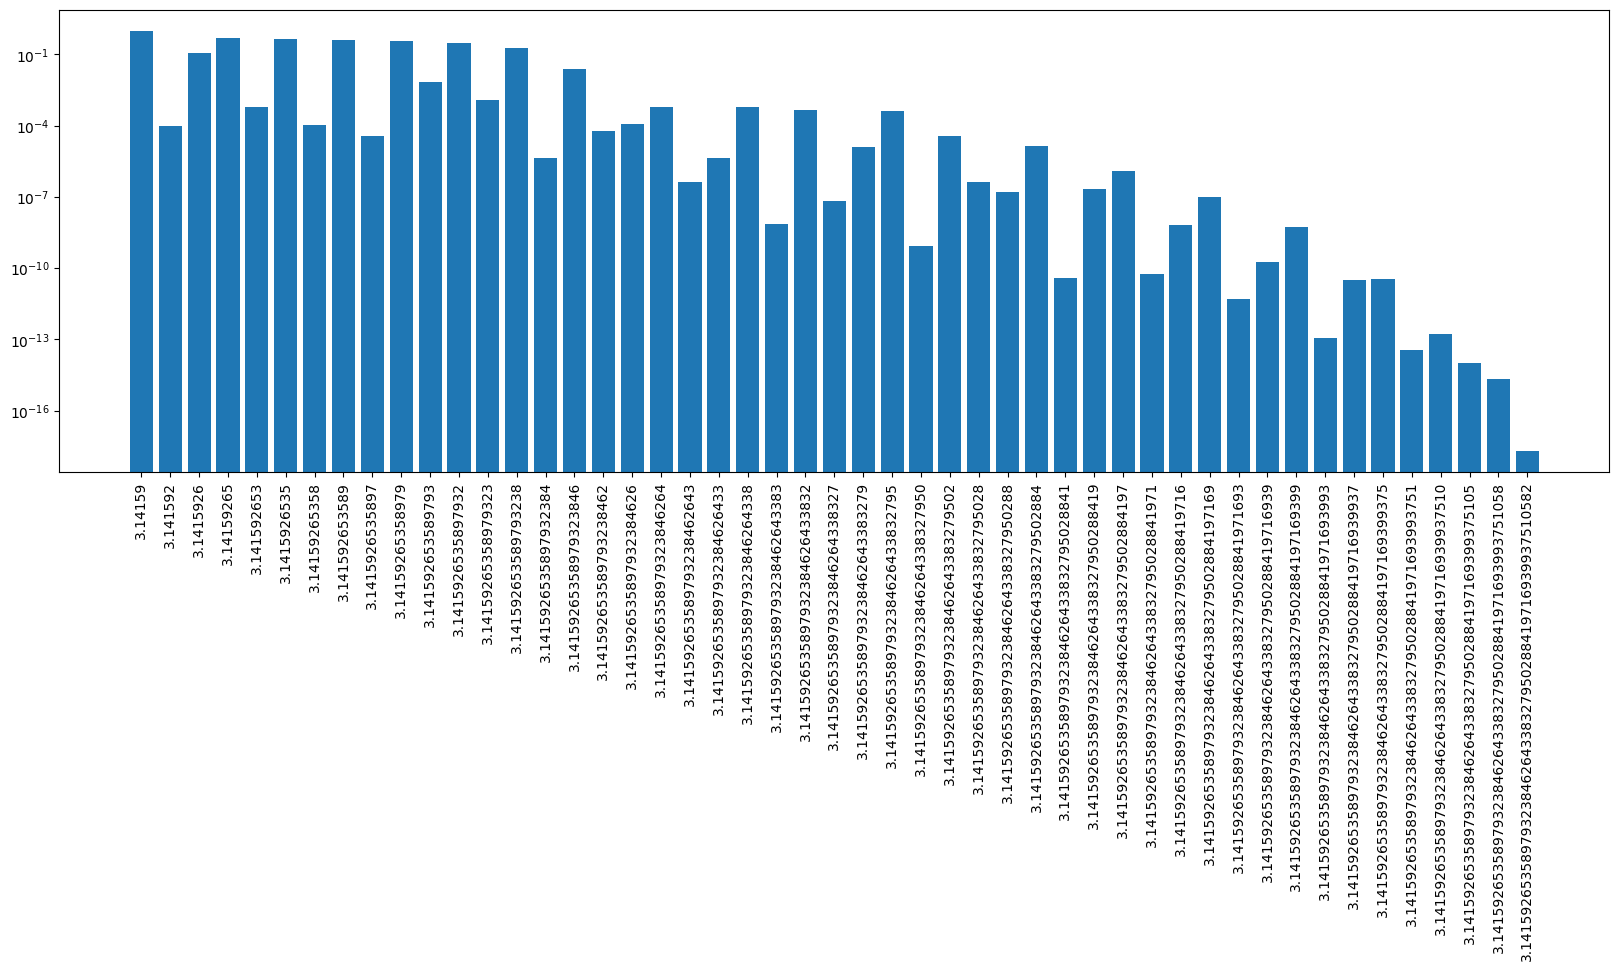

In [144]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,6))

ax.set_yscale("log")
ax.set_xticks(list(q.keys()))
ax.set_xticklabels([pi[0:i] for i in q.keys()], rotation=90)
ax.bar(q.keys(), height=q.values())

fig